In [28]:
# Author: Carlos M. Figueroa Palomino
# Date: 4/30/2023
# Description: Python code that creates a multiple linear regression model from a dataset and analyzes its accuracy.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/california_housing.csv')
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [4]:
df.drop(df.columns[[0]], axis=1, inplace=True)
features_names = df.columns.to_list()[:-1]
X = df[features_names] 
Y = df['median_house_value']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

In [9]:
median_value_pred = my_linear_regression.predict(X_test)
median_value_pred

array([249940.69029627,  67409.9744936 , 103725.64297671, ...,
       210163.12655333,  96945.62478322, 271126.43132744])

In [10]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, median_value_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, median_value_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, median_value_pred)))

Mean Absolute Error: 50091.752230618564
Mean Squared Error: 4953215595.461732
Root Mean Squared Error: 70379.08492913027


In [11]:
def MAPE(Y, pred): # MAPE: Mean Abs Percentage Error
  l1 = list(Y)
  l2 = list(pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er)

In [12]:
print('MAPE:', MAPE(Y_test, median_value_pred)*100, "%")

MAPE: 29.81626124673898 %


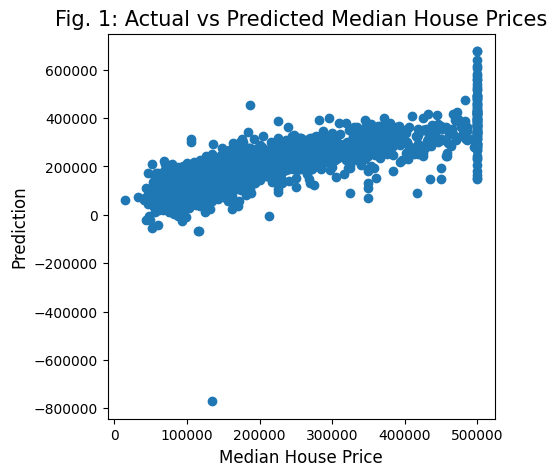

In [25]:
plt.figure(figsize = (5, 5))
plt.scatter(x = Y_test, y = median_value_pred, color = 'Tab:blue')
plt.title('Fig. 1: Actual vs Predicted Median House Prices', fontsize = 15)
plt.xlabel('Median House Price', fontsize = 12)
plt.ylabel('Prediction', fontsize = 12)
plt.show()

In [14]:
print("R^2 =", my_linear_regression.score(X_train, Y_train))

R^2 = 0.6397282669812736


In [17]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
for i in range(len(features_names)):
  print('The coef (b_{}) is  {}'.format(i+1, my_linear_regression.coef_[i]))

The intercept (b_0) is  -3630662.3107113964
The coef (b_1) is  -43332.36985914065
The coef (b_2) is  -43196.13008593735
The coef (b_3) is  1147.9102077121177
The coef (b_4) is  -7.397580382115848
The coef (b_5) is  108.91898926735757
The coef (b_6) is  -42.83476576881367
The coef (b_7) is  59.28410671396432
The coef (b_8) is  40013.27472506335


$y = -3630662.31 -43332.37x_1 -43196.13x_2 +1147.91x_3 -7.40x_4 +108.92x_5 -42.83x_6 +59.28x_7 +40013.27x_8$

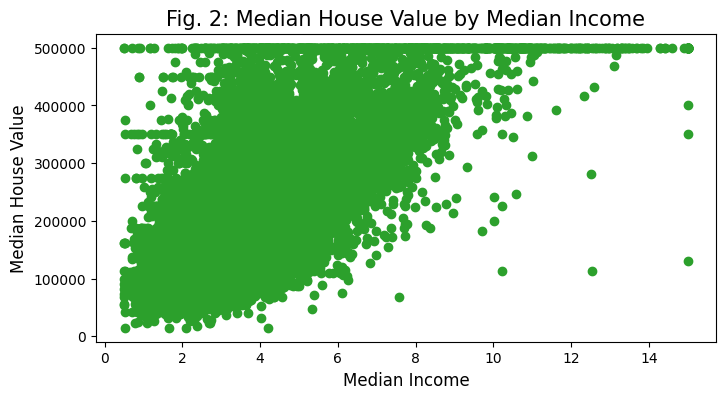

In [26]:
plt.figure(figsize = (8, 4))
plt.scatter(x = df['median_income'], y = df['median_house_value'], color = 'Tab:green')
plt.title('Fig. 2: Median House Value by Median Income', fontsize = 15)
plt.xlabel('Median Income', fontsize = 12)
plt.ylabel('Median House Value', fontsize = 12)
plt.show()

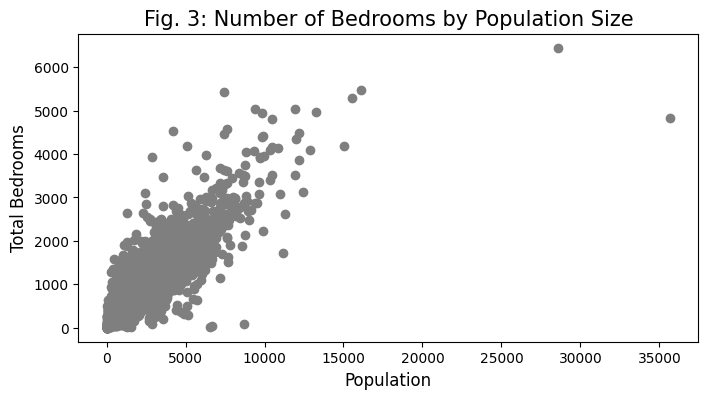

In [27]:
plt.figure(figsize = (8, 4))
plt.scatter(x = df['population'], y = df['total_bedrooms'], color = 'Tab:gray')
plt.title('Fig. 3: Number of Bedrooms by Population Size', fontsize = 15)
plt.xlabel('Population', fontsize = 12)
plt.ylabel('Total Bedrooms', fontsize = 12)
plt.show()

# **Final Remarks**

The Multiple Linear Regression Model can be represented by the following equation: 

$y=−3630662.31−43332.37x_1−43196.13x_2+1147.91x_3−7.40x_4+108.92x_5−42.83x_6+59.28x_7+40013.27x_8$

It has a Mean Absolute Percentage Error of 29.82% and R-squared of 64%.

The dataset contains some outliers as can be noticed in Figure 1, but overall constitutes a good representation for forecasting Median House Values. Two scatter plots showcase the positive correlation between some of the model variables.

Figure 2 highlights how as Median Income increases, the Median House Value also increases.

Figure 3 demonstrates how the increment in Population generates more demand for Total Bedrooms.

